# Descriptive Modeling
# Subhashini Natarajan

In [66]:
# Load required libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.metrics import silhouette_score

In [67]:
# Read the als data into a dataframe
als_df = pd.read_csv("/Users/manikantanvenkataraman/Downloads/als_data.csv")
als_df.head()

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,...,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,1,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,...,143.0,0.017422,533,8,7.0,7,0.002646,6.0,6.0,6.0
1,2,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,...,136.0,0.010453,649,8,7.0,5,0.005386,7.0,5.0,5.0
2,3,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,...,140.0,0.008929,1234,5,0.0,0,0.008929,6.0,5.0,5.0
3,4,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,...,138.0,0.012469,2492,5,5.0,3,0.004988,7.0,6.0,5.0
4,5,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,...,138.0,0.008292,2956,6,4.0,1,0.008489,6.0,5.0,5.0


In [68]:
#Remove irrelavant data 

als_df.drop(['ID'], axis = 1, inplace = True)
als_df.head()

,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,...,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,0.021164,...,143.0,0.017422,533,8,7.0,7,0.002646,6.0,6.0,6.0
1,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,0.028725,...,136.0,0.010453,649,8,7.0,5,0.005386,7.0,5.0,5.0
2,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,0.025000,...,140.0,0.008929,1234,5,0.0,0,0.008929,6.0,5.0,5.0
3,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,0.014963,...,138.0,0.012469,2492,5,5.0,3,0.004988,7.0,6.0,5.0
4,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,0.020374,...,138.0,0.008292,2956,6,4.0,1,0.008489,6.0,5.0,5.0


In [20]:
features=als_df

In [23]:
# standardize features

scaler = StandardScaler()
x_std=scaler.fit_transform(features)
x_std[:5]

array([[-1.74276716e+00,  9.17136983e-01,  3.08941722e+00,
        -1.30078105e+00, -8.66550089e-01,  5.48092948e+00,
        -3.18520120e-01,  1.34959879e-01,  2.47367899e-01,
        -3.01588467e-01, -6.79085269e-01, -7.04767241e-01,
        -4.46605772e-01, -4.53086914e-01, -3.43749805e-01,
        -1.64404050e-01,  1.97133625e-01, -2.53516298e-01,
        -2.83618538e-01,  4.71373703e-01,  7.62329697e-01,
         4.90774047e-02,  2.92859599e-01,  1.16967352e+00,
         1.78065854e+00, -4.03233483e-01, -2.31901530e-01,
         2.60443579e-01, -1.05509751e-01,  2.89532342e-01,
         8.16773688e-01,  7.74853650e-01,  1.39114351e+00,
         3.27228335e-01,  1.11898292e-01, -1.41443932e+00,
        -1.33418881e-02,  8.63964983e-01,  7.06250323e-01,
         1.93837712e+00,  1.08444436e+00,  2.60029864e-01,
         3.99225881e-02,  8.27717849e-01,  1.01594400e+00,
        -7.33335170e-01, -1.32592025e+00,  1.09146338e-01,
        -7.97425559e-01, -3.79966423e-02,  7.89353067e-0

In [29]:
# Determine silhoutte coefficient

sse=[]
for k in range(1,12):
    model=KMeans(n_clusters=k)
    model.fit(x_std)
    sse.append(model.inertia_)
    

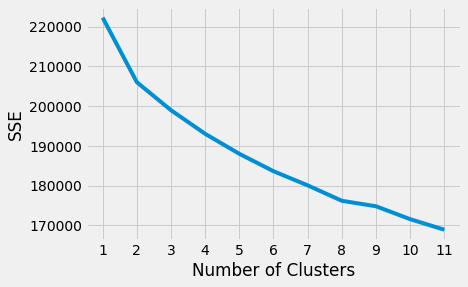

In [74]:
# Plot Silhoutte coefficient

plt.plot(range(1, 12), sse)
plt.xticks(range(1, 12))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [61]:
# Determine Silhoutte Score
silhouette_coefficients = []

for k in range(2, 12):
    model = KMeans(n_clusters=k, )
    model.fit(x_std)
    score = silhouette_score(x_std, model.labels_)
    silhouette_coefficients.append(score)
    


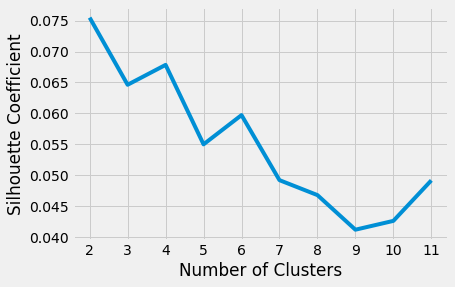

In [62]:
# Plot Silhoutte Coefficient

plt.style.use("fivethirtyeight")
plt.plot(range(2, 12), silhouette_coefficients)
plt.xticks(range(2, 12))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [78]:
# Perform KMeans with optimal number of clusters - 2

cluster=KMeans(n_clusters=2, random_state=0)
model=cluster.fit(x_std)
print("The sse value is:", model.inertia_)
print("\nThe final locations of centroid:", model.cluster_centers_)
print("\nThe number of iterations required to converge:", model.n_iter_)

The sse value is: 206048.07072389426

The final locations of centroid: [[ 1.98820640e-02 -6.58919500e-04  1.01828865e-01  1.52857772e-01
   1.95618880e-01 -1.84161694e-01  6.03945364e-01  7.21116258e-01
   7.86550963e-01 -5.56330217e-01 -1.31107791e-03  9.42110141e-02
   1.46798727e-01 -1.01458892e-01  5.20639117e-02  1.61420310e-01
   1.97882294e-01 -5.76825448e-02  2.52618054e-02  7.32616808e-02
   6.00737340e-02 -1.50426392e-01  5.17543451e-02  1.23436837e-01
   1.63987530e-01 -1.71575746e-01 -4.38068308e-02  3.70506720e-03
   3.52002358e-02 -1.52381458e-01 -1.25144310e-02  3.21123481e-02
   7.72311613e-02 -1.73719750e-01 -5.28932127e-02 -9.25494059e-02
  -3.90507125e-02 -8.51126132e-02  7.60585389e-02  1.20707134e-01
   1.58056949e-01 -1.93436986e-01  2.66669932e-01  3.01066338e-01
   3.54314868e-01 -1.67004743e-01  1.40729593e-01 -7.85860227e-02
  -5.52817789e-02 -1.68668585e-02 -1.33586286e-01  4.46267475e-01
   5.48800643e-01  6.47375550e-01 -4.41644812e-01 -4.55351513e-02
  -3.

In [79]:
# Perform PCA and fit the scaled data 
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
als_pca=pca.fit_transform(x_std)

In [80]:
# Store the PCA components into a dataframe and classify the segments
pca_als_df=pd.DataFrame(data = als_pca
             , columns = ['principal_component_1', 'principal_component_2'])
pca_als_df['K_Means_PCA'] = model.labels_
pca_als_df['Segment'] = pca_als_df['K_Means_PCA'].map({0:'first',1:'second'})
pca_als_df.tail()

,principal_component_1,principal_component_2,K_Means_PCA,Segment
2218,-4.394423,1.209641,0,first
2219,-0.320134,-1.874535,0,first
2220,-0.199063,4.273269,0,first
2221,-0.397682,3.309732,0,first
2222,0.896618,0.500368,1,second


/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


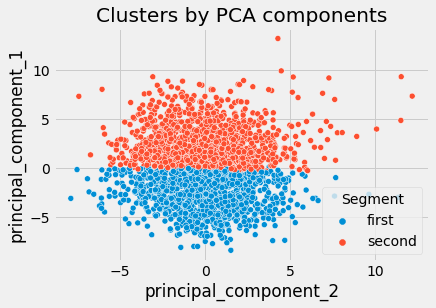

In [81]:
# Plot PCA components -
sns.scatterplot(pca_als_df.principal_component_2,pca_als_df.principal_component_1, 
                hue =pca_als_df['Segment'])
plt.title('Clusters by PCA components')
plt.show()